In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd
from google.colab import files
uploaded = files.upload() # Upload your CSV file
df = pd.read_csv("students_dataset.csv") # Replace with your file name
df.head()



Saving students_dataset.csv to students_dataset (1).csv


,Name,Age,Marks,Attendance,Passed
0,Alice,20.0,85.0,90.0,Yes
1,Bob,21.0,NaN,80.0,No
2,Charlie,NaN,78.0,NaN,Yes
3,David,22.0,90.0,85.0,Yes
4,Eve,20.0,88.0,95.0,No



Missing values count:
Name           0
Age            0
Marks          0
Attendance     0
Passed         0
Performance    0
Age_Group      0
dtype: int64

DataFrame after dropping missing values:
       Name   Age  Marks  Attendance Passed Performance Age_Group
0     Alice  20.0   85.0       90.00    Yes        High     Young
1       Bob  21.0   82.0       80.00     No      Medium     Young
2   Charlie  22.0   78.0       85.25    Yes      Medium     Adult
3     David  22.0   90.0       85.00    Yes        High     Adult
4       Eve  20.0   88.0       95.00     No        High     Young
5     Frank  22.0   76.0       70.00    Yes      Medium     Adult
6     Grace  23.0   82.0       88.00     No      Medium     Adult
7      Hank  21.0   80.0       85.25    Yes      Medium     Young
8       Ivy  24.0   92.0       92.00    Yes        High     Adult
9      Jack  22.0   79.0       85.00     No      Medium     Adult
10    Kelly  22.0   82.0       78.00    Yes      Medium     Adult
11      Leo

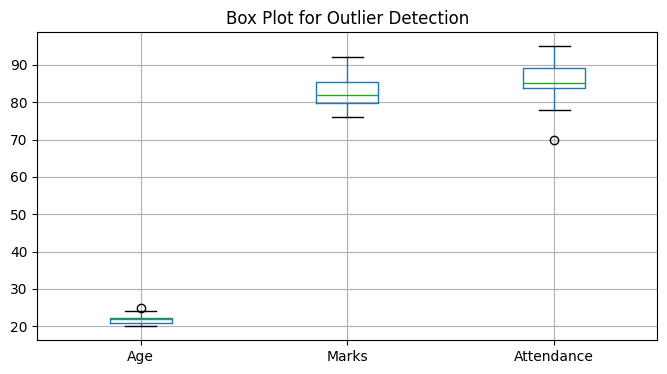


Outliers detected:
Empty DataFrame
Columns: [Name, Age, Marks, Attendance, Passed, Performance, Age_Group]
Index: []


In [ ]:
import matplotlib.pyplot as plt
# Identifying missing values
print("\nMissing values count:")
print(df.isnull().sum())

# Removing rows with missing values
df_cleaned = df.dropna()
print("\nDataFrame after dropping missing values:")
print(df_cleaned)

# Filling missing values
# Numerical columns
df = df.assign(
    Age=df["Age"].fillna(df["Age"].mean()),
    Marks=df["Marks"].fillna(df["Marks"].median()),
    Attendance=df["Attendance"].fillna(df["Attendance"].mean()),
    Passed=df["Passed"].fillna(df["Passed"].mode()[0])
)

print("\nDataFrame after filling missing values:")
print(df)

# Removing duplicate rows
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
print(df)

# Detecting outliers using Box Plot
plt.figure(figsize=(8, 4))
df.boxplot(column=["Age", "Marks", "Attendance"])
plt.title("Box Plot for Outlier Detection")
plt.show()

# Detecting outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print("\nOutliers detected:")
print(df[outliers])

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# Standardization (Mean = 0, Standard Deviation = 1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])

print("Dataset after Standard Scaling:\n", df_scaled)

# Normalization (Values between 0 and 1)
scaler = MinMaxScaler()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])

Dataset after Standard Scaling:
        Name   Age     Marks  Attendance Passed
0     Alice  20.0  0.505490    0.804154    Yes
1       Bob  21.0 -0.168497   -0.888802     No
2   Charlie  22.0 -1.067146    0.000000    Yes
3     David  22.0  1.628802   -0.042324    Yes
4       Eve  20.0  1.179478    1.650632     No
5     Frank  22.0 -1.516471   -2.581758    Yes
6     Grace  23.0 -0.168497    0.465563     No
7      Hank  21.0 -0.617822    0.000000    Yes
8       Ivy  24.0  2.078127    1.142745    Yes
9      Jack  22.0 -0.842484   -0.042324     No
10    Kelly  22.0 -0.168497   -1.227393    Yes
11      Leo  23.0  0.954815    0.000000    Yes
12     Mona  21.0  0.056166   -0.888802     No
13     Nina  22.0 -1.291809    0.634858    Yes
14    Oscar  25.0 -0.168497    0.973450     No
15     Paul  22.0 -0.393159    0.000000    Yes


In [ ]:
# Define function to categorize performance based on marks
def performance_category(marks):
    if marks >= 85:
        return "High"
    elif marks >= 70:
        return "Medium"
    else:
        return "Low"

# Apply function to create new column
df["Performance"] = df["Marks"].apply(performance_category)

print("Dataset after Performance Category:\n", df)
# Creating Age Groups using binning
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 21, 24, 27], labels=["Young", "Adult", "Senior"])

print("Dataset after Age Grouping:\n", df)

Dataset after Performance Category:
        Name   Age  Marks  Attendance Passed Performance
0     Alice  20.0   85.0       90.00    Yes        High
1       Bob  21.0   82.0       80.00     No      Medium
2   Charlie  22.0   78.0       85.25    Yes      Medium
3     David  22.0   90.0       85.00    Yes        High
4       Eve  20.0   88.0       95.00     No        High
5     Frank  22.0   76.0       70.00    Yes      Medium
6     Grace  23.0   82.0       88.00     No      Medium
7      Hank  21.0   80.0       85.25    Yes      Medium
8       Ivy  24.0   92.0       92.00    Yes        High
9      Jack  22.0   79.0       85.00     No      Medium
10    Kelly  22.0   82.0       78.00    Yes      Medium
11      Leo  23.0   87.0       85.25    Yes        High
12     Mona  21.0   83.0       80.00     No      Medium
13     Nina  22.0   77.0       89.00    Yes      Medium
14    Oscar  25.0   82.0       91.00     No      Medium
15     Paul  22.0   81.0       85.25    Yes      Medium
Dataset aft